- Importing libraries

In [1]:
import pandas as pd
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/kaggle/input/acled-2023/africa.xlsx")
data.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ALG1,1997-01-01,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,NaN,1582579226
1,ALG2,1997-01-02,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,NaN,1582579226
2,ALG3,1997-01-03,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,NaN,1582579226
3,ALG4,1997-01-04,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,NaN,1582579226
4,ALG5,1997-01-05,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,NaN,1582579226


In [3]:
data.head().T

,0,1,2,3,4
EVENT_ID_CNTY,ALG1,ALG2,ALG3,ALG4,ALG5
EVENT_DATE,1997-01-01 00:00:00,1997-01-02 00:00:00,1997-01-03 00:00:00,1997-01-04 00:00:00,1997-01-05 00:00:00
YEAR,1997,1997,1997,1997,1997
TIME_PRECISION,1,1,1,1,1
DISORDER_TYPE,Political violence,Political violence,Political violence,Political violence,Political violence
EVENT_TYPE,Violence against civilians,Violence against civilians,Violence against civilians,Violence against civilians,Violence against civilians
SUB_EVENT_TYPE,Attack,Attack,Attack,Attack,Attack
ACTOR1,GIA: Armed Islamic Group,GIA: Armed Islamic Group,GIA: Armed Islamic Group,GIA: Armed Islamic Group,GIA: Armed Islamic Group
ASSOC_ACTOR_1,NaN,NaN,NaN,NaN,NaN
INTER1,2,2,2,2,2


- Checking for missing data

<AxesSubplot:>

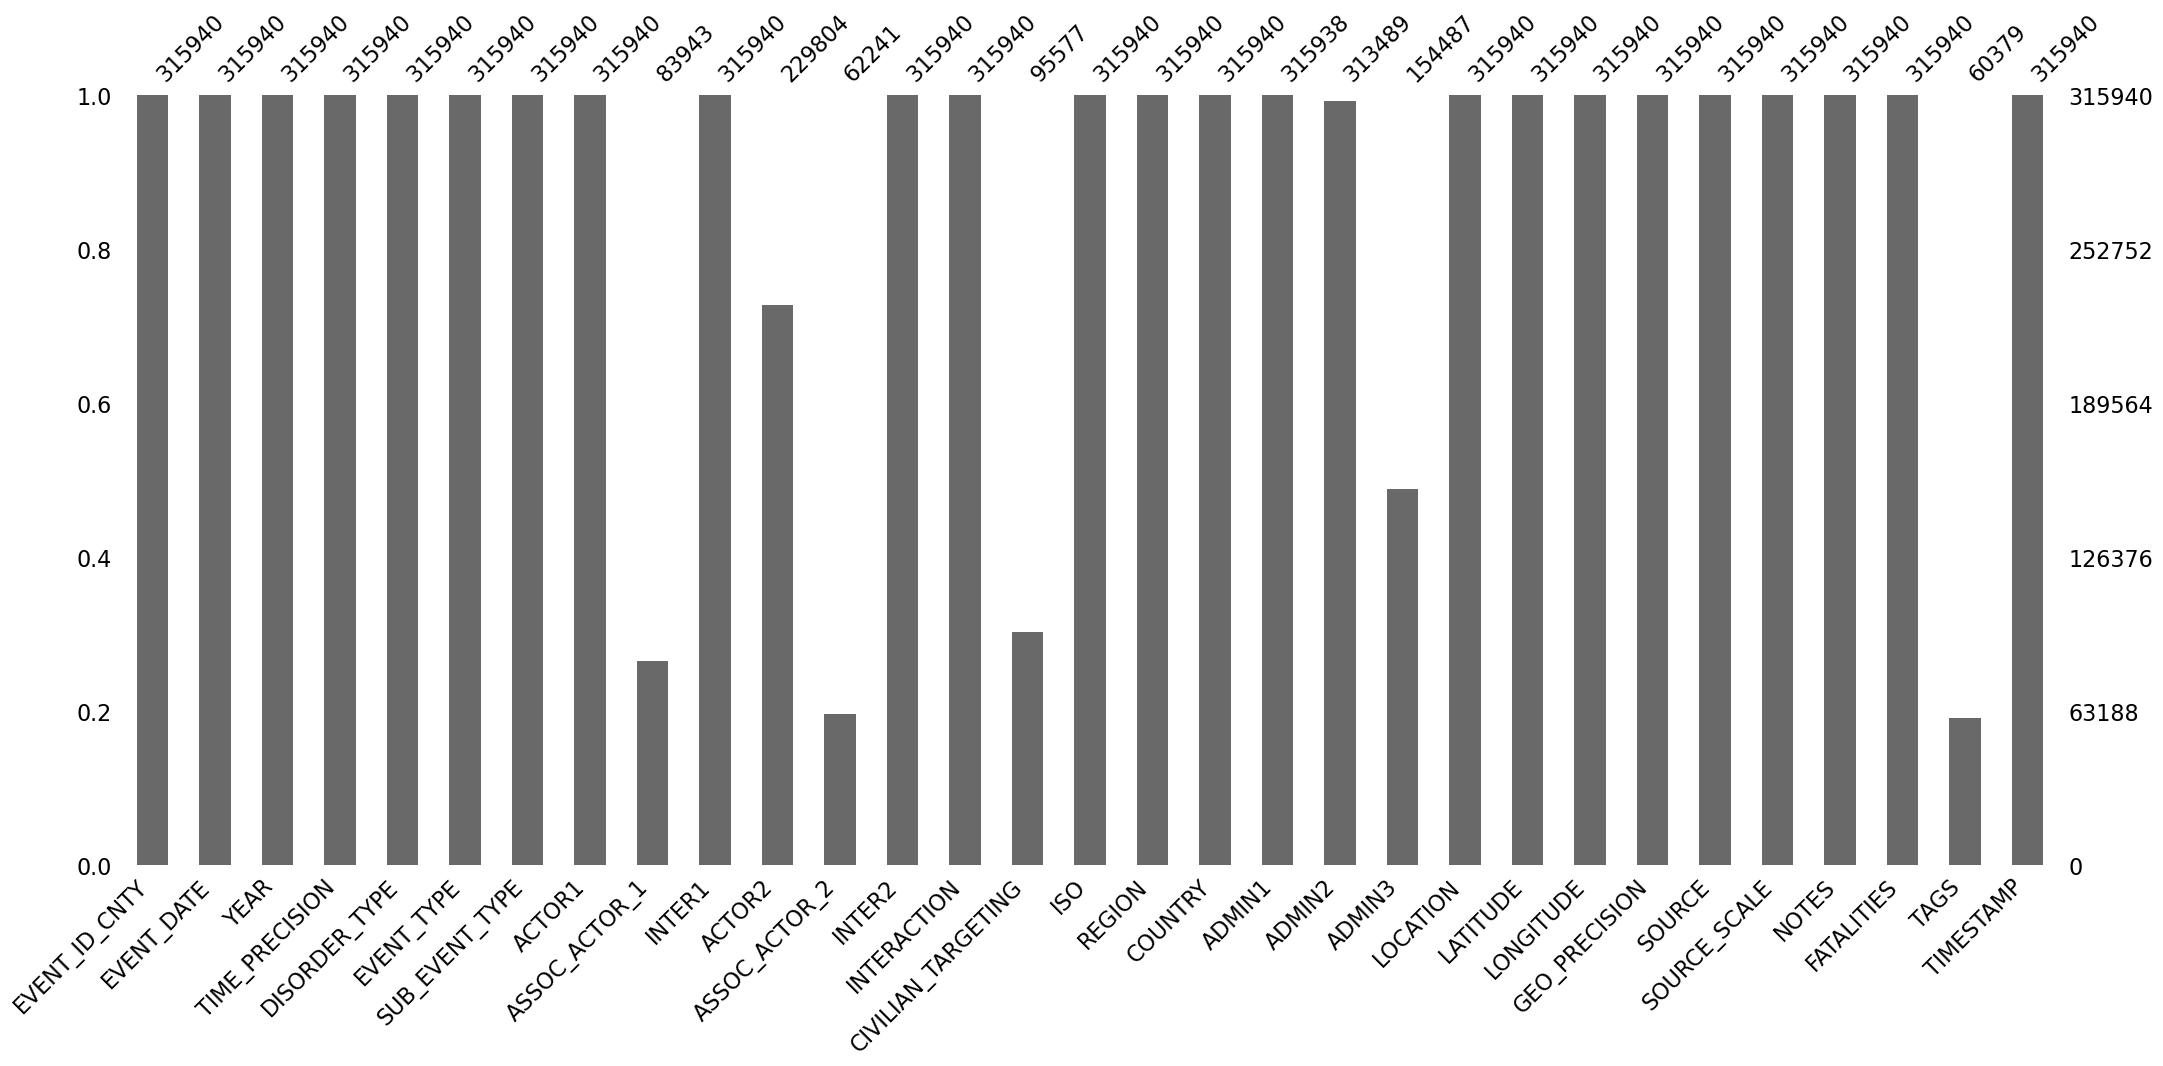

In [4]:
msno.bar(data)

- **Checking** the countries with the least conflict count

In [5]:
conflict_count = data["COUNTRY"].value_counts()

- Most conflicts

<AxesSubplot:>

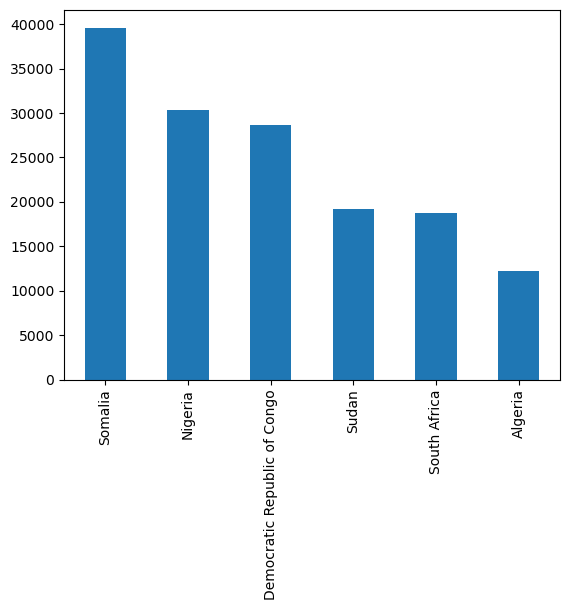

In [6]:
conflict_count.head(6).plot(kind="bar")

- **Least** conflicts

<AxesSubplot:>

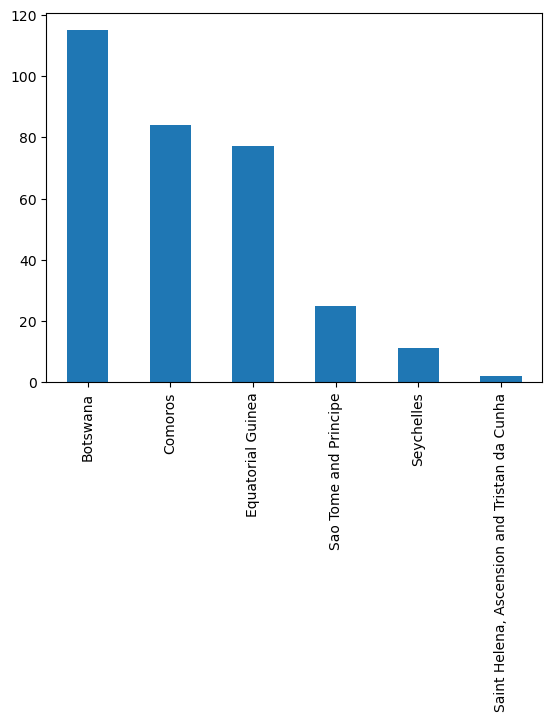

In [7]:
conflict_count.tail(6).plot(kind="bar")

- Creating a pandas dataframe only containing the last 3 countries (excluding St. Helena) for further investigation

In [18]:
least = data.query("COUNTRY in ('Equatorial Guinea', 'Sao Tome and Principe','Seychelles')")
most = data.query("COUNTRY in ('Somalia', 'Nigeria','Democratic Republic of Congo')")

- **Confirming** we have the right countries

In [19]:
print(least["COUNTRY"].unique())
print(most["COUNTRY"].unique())

['Equatorial Guinea' 'Sao Tome and Principe' 'Seychelles']
['Democratic Republic of Congo' 'Nigeria' 'Somalia']


- Check for missing values in our new df

<AxesSubplot:>

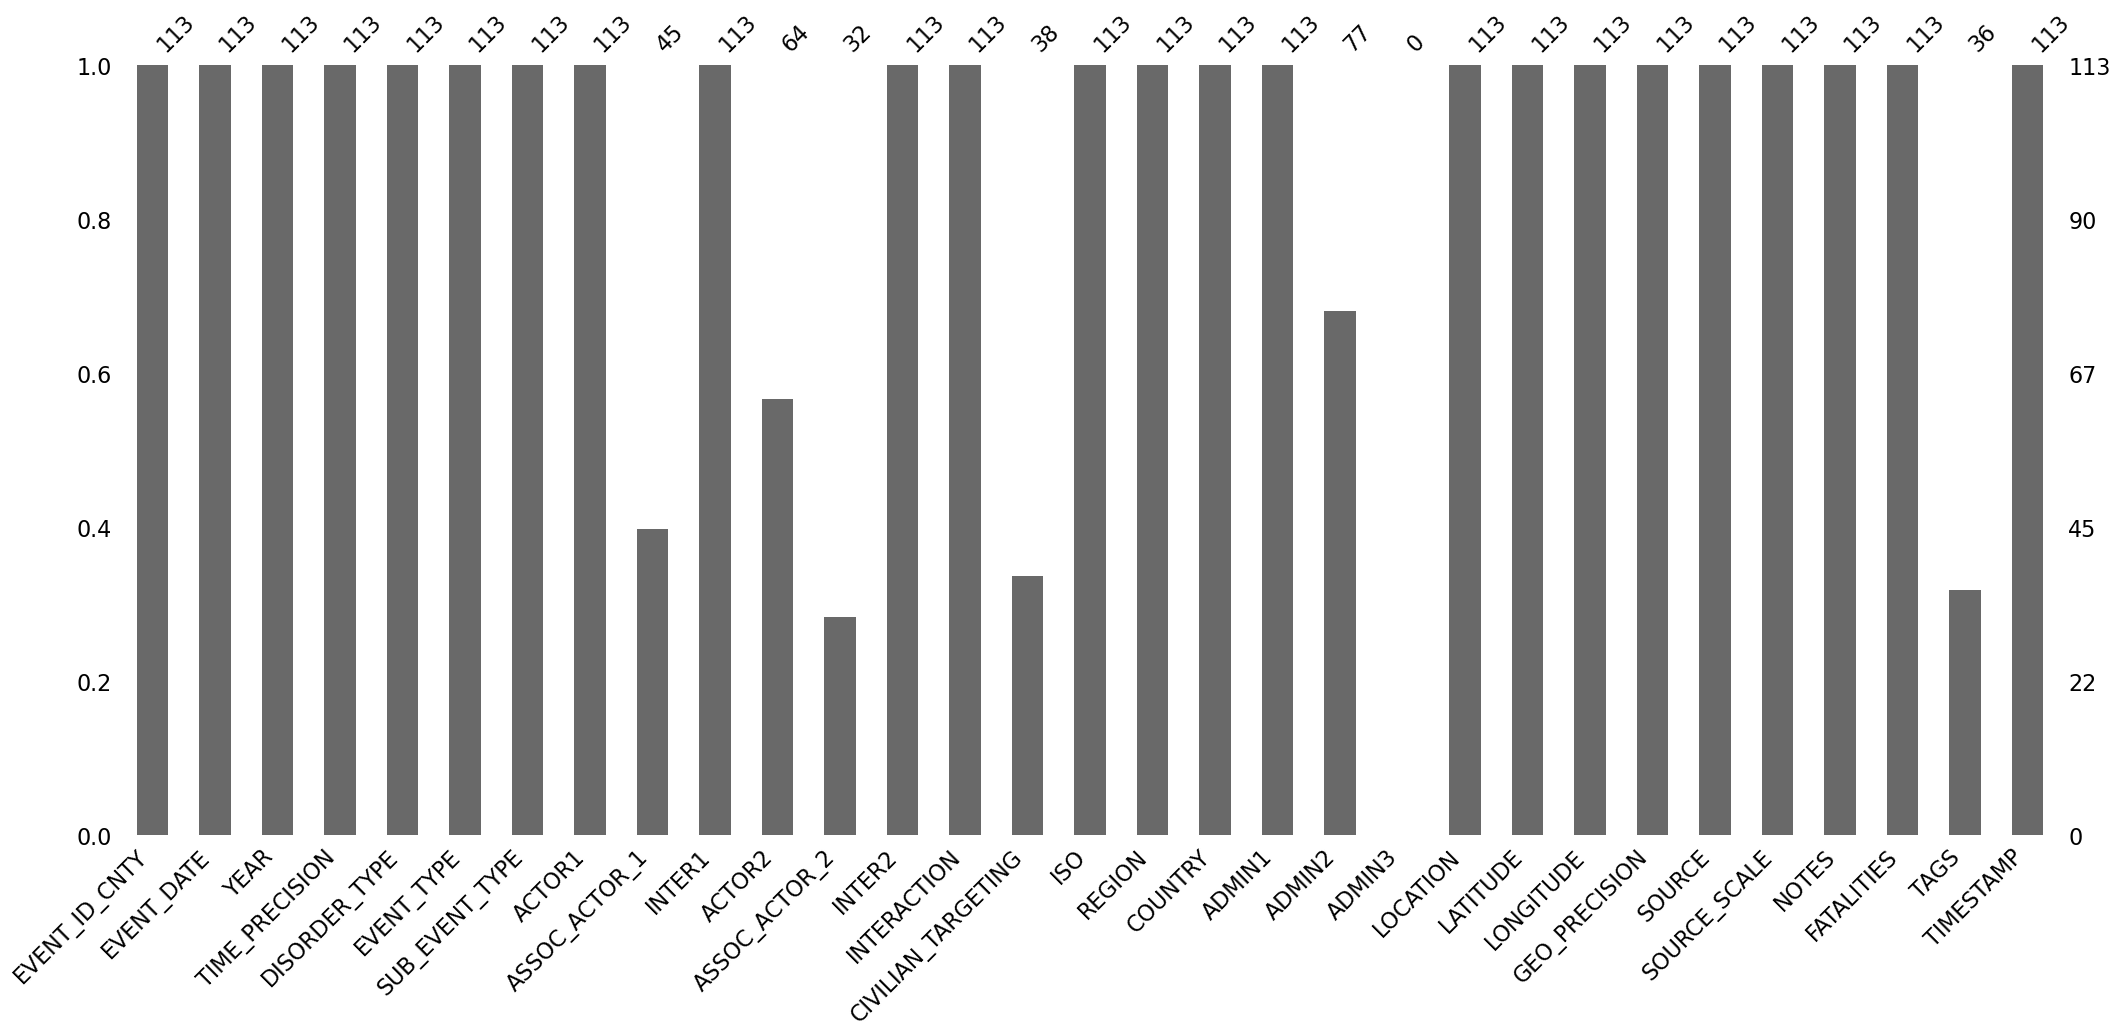

In [20]:
msno.bar(least)

<AxesSubplot:>

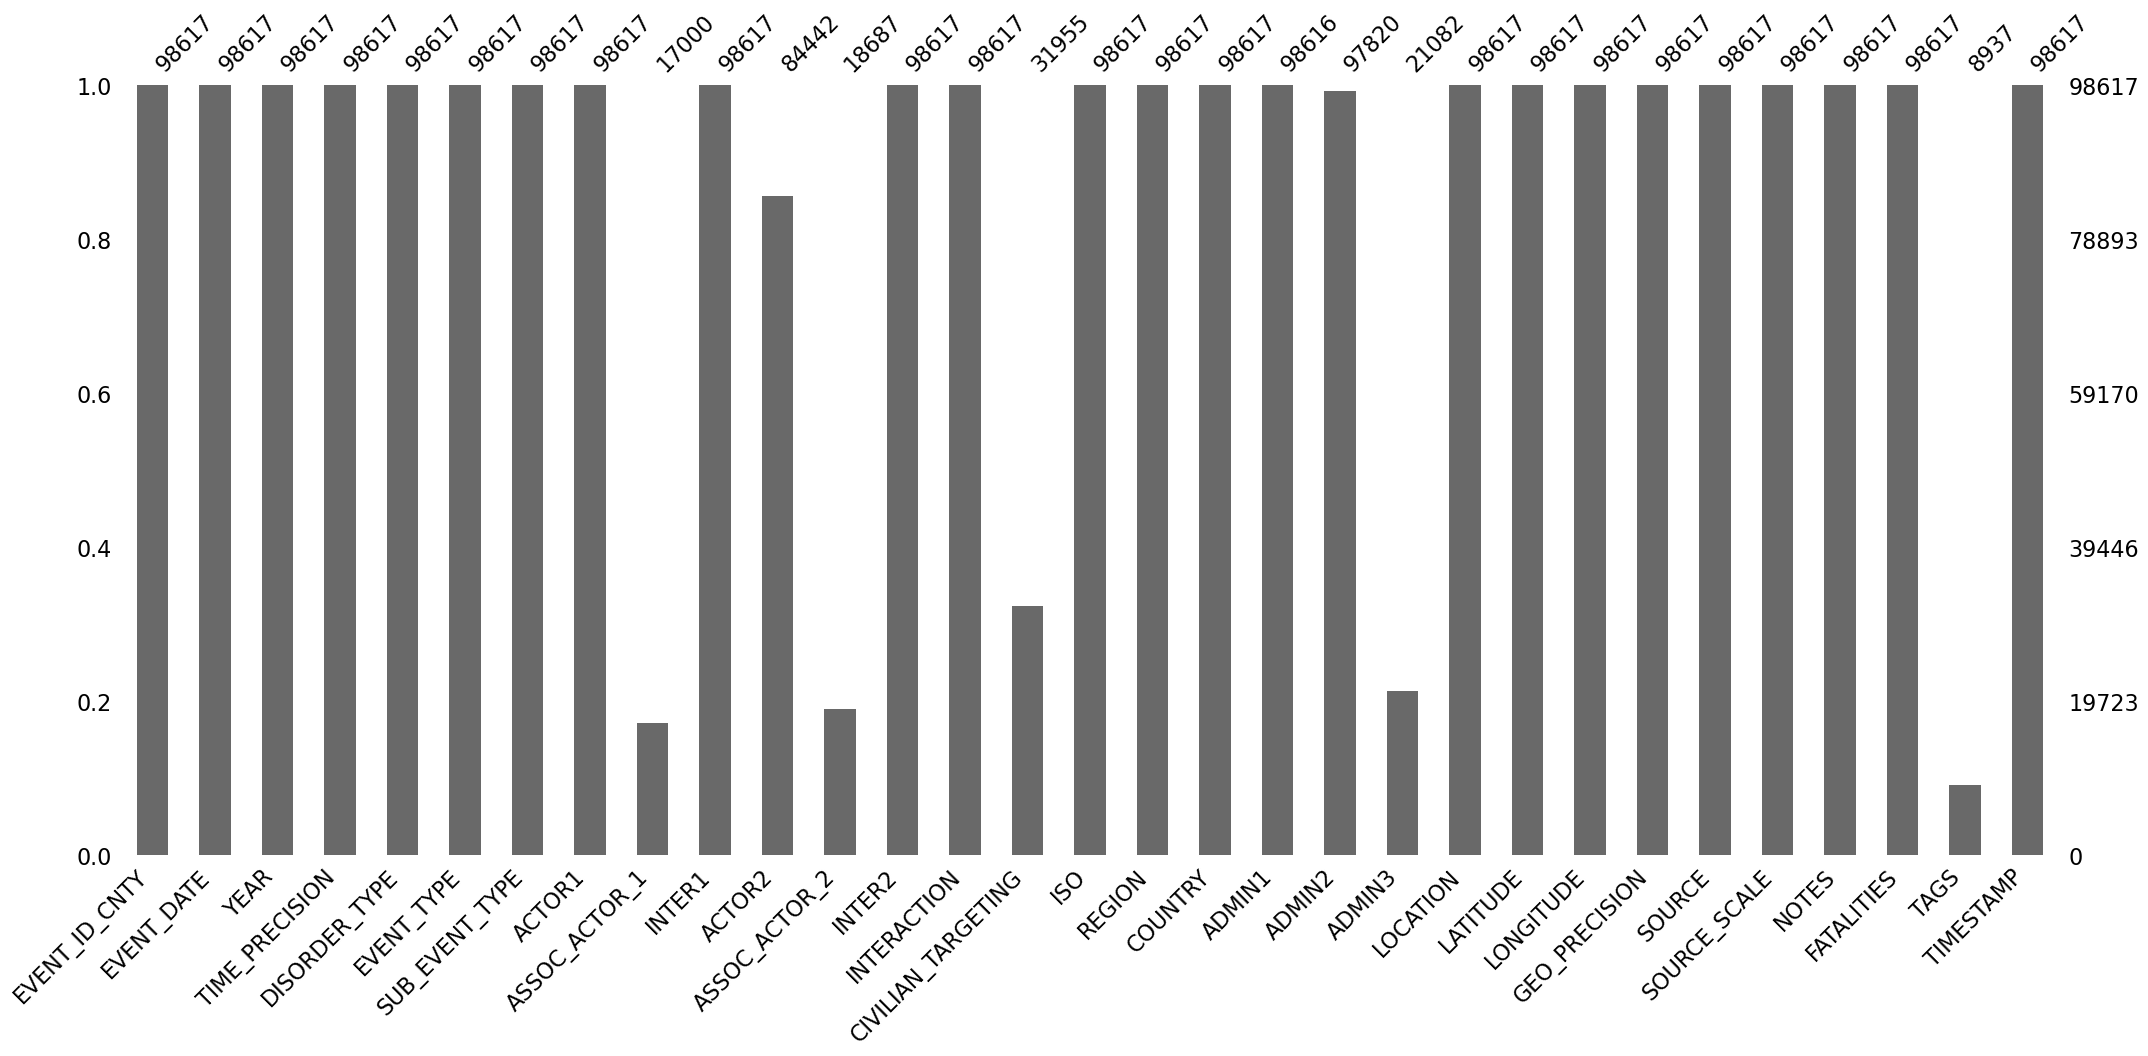

In [21]:
msno.bar(most)

- Missing data was present in the same columns for both cases
- For accurate represantation of the available data, I will drop all columns with null values

<AxesSubplot:>

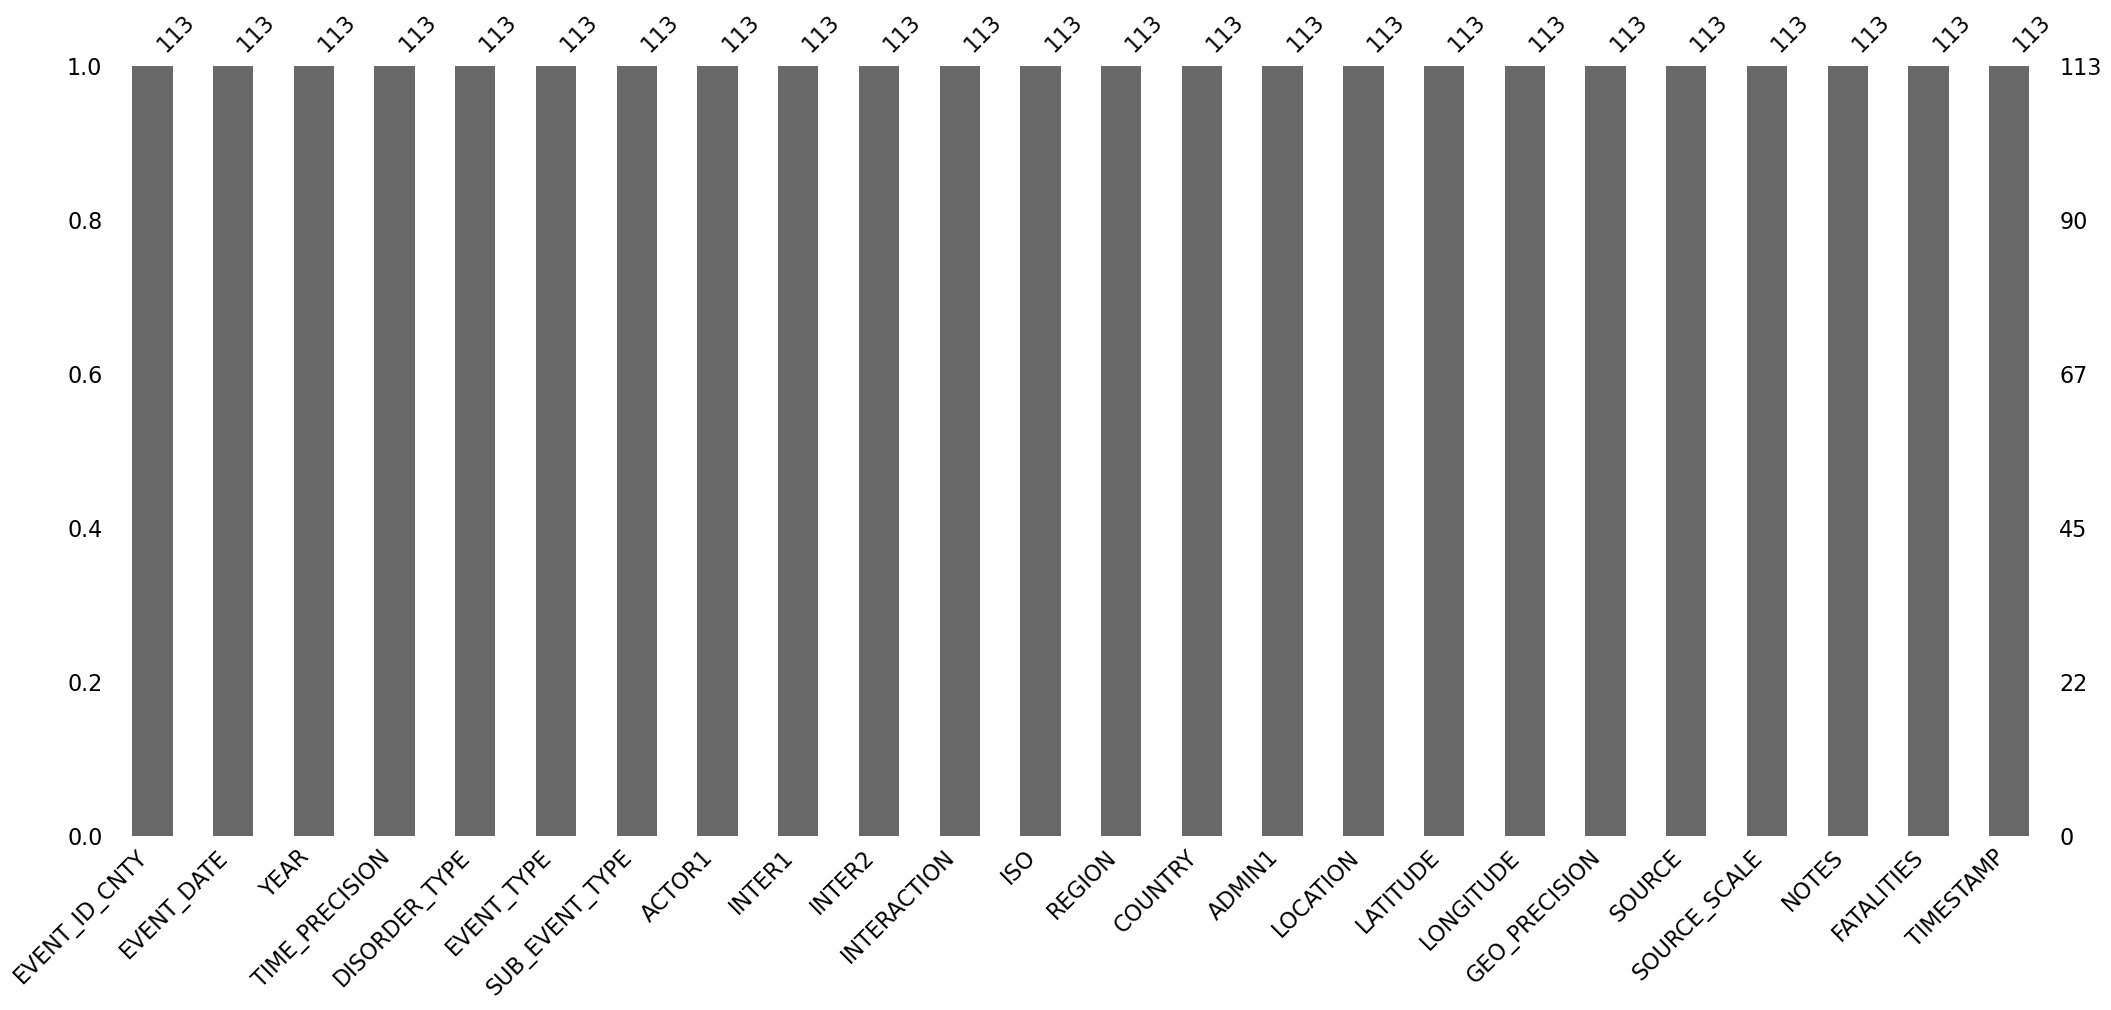

In [22]:
least = least.dropna(axis=1)
msno.bar(least)

<AxesSubplot:>

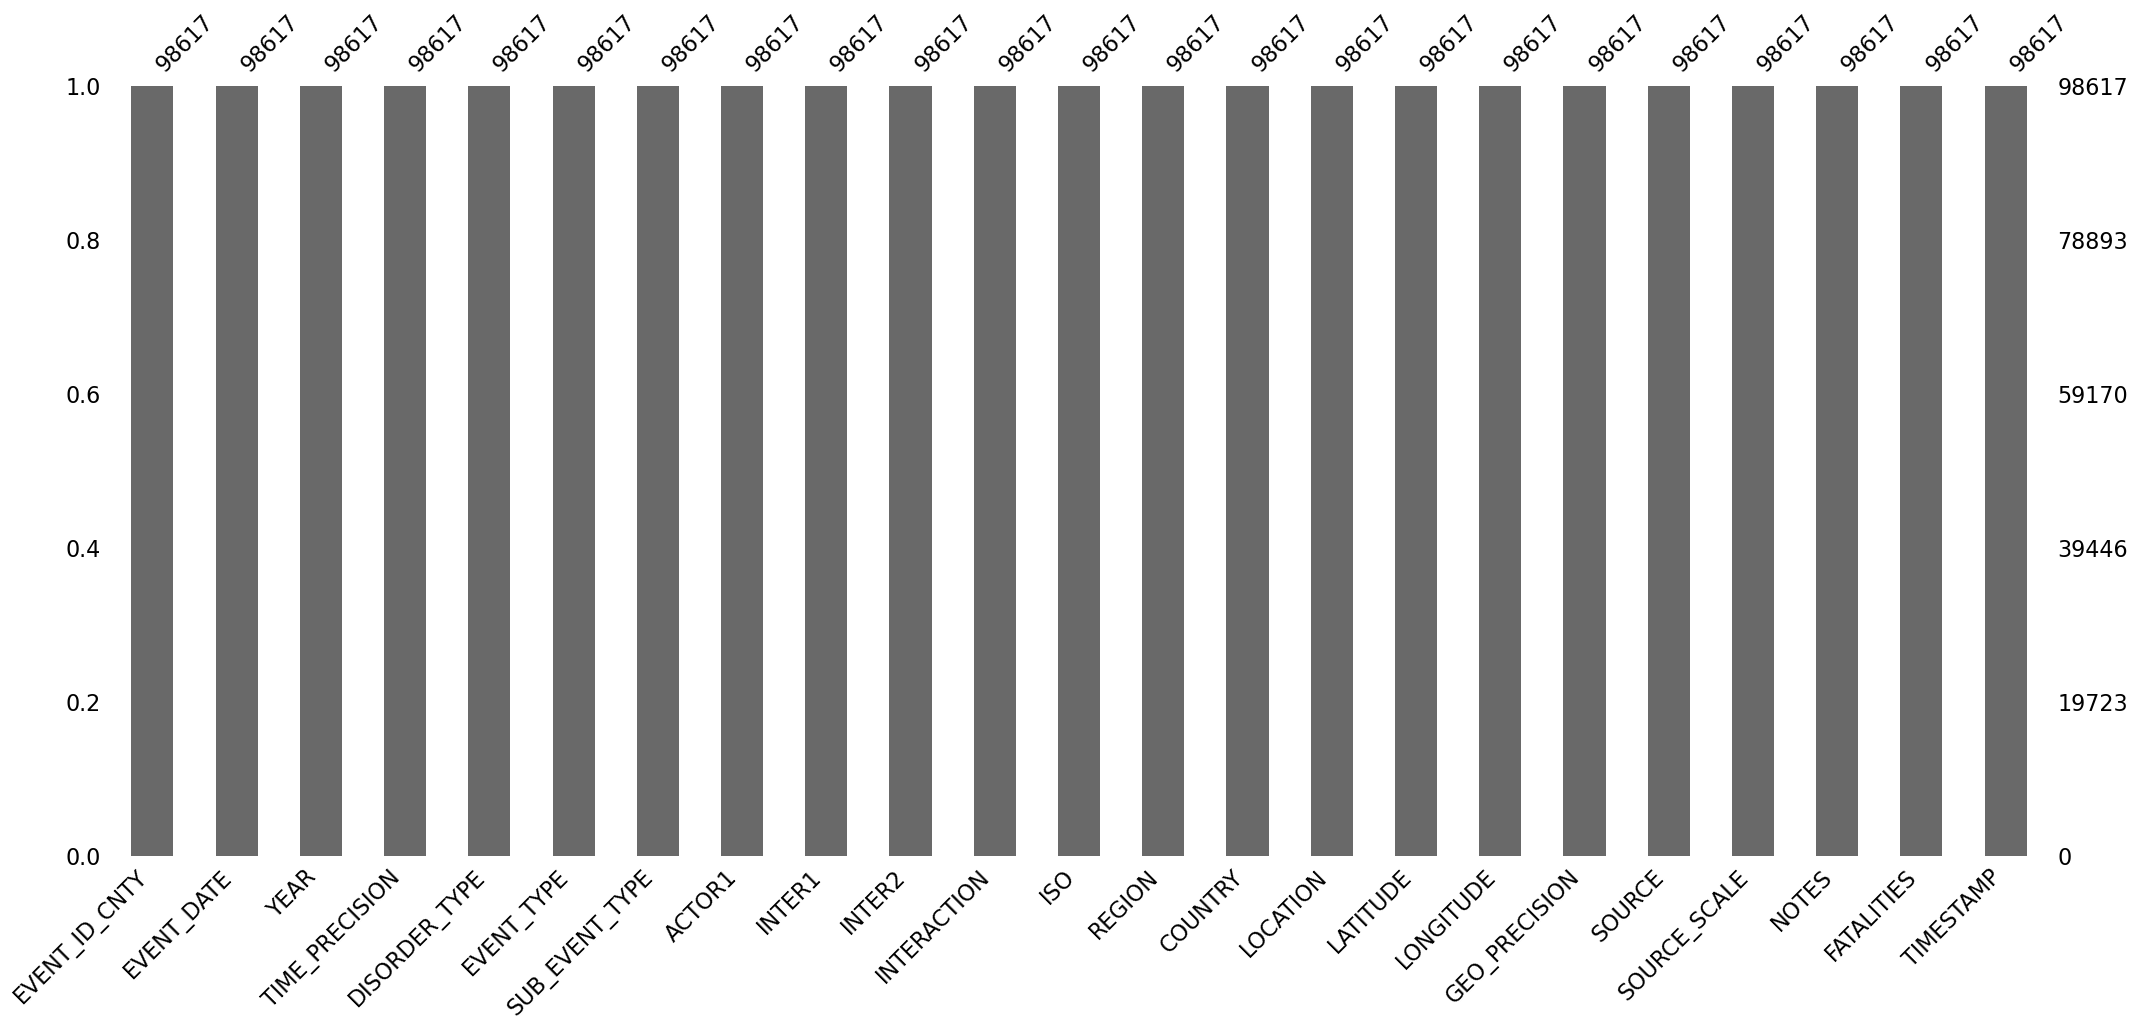

In [23]:
most = most.dropna(axis=1)
msno.bar(most)

- We investigate our df using columns with complete data
- Types of actors involved in the countries

In [14]:
least["INTER1"].unique()

array([1, 3, 6, 5, 2])

In [15]:
most["INTER1"].unique()

array([2, 1, 5, 3, 6, 8, 4, 7])

- There are groups in ***most*** that are not present in countries with the ***least*** conflicts are 
- These are **4, 7 & 8**
- More details on these 3 classes to be seen in other group members research

<AxesSubplot:>

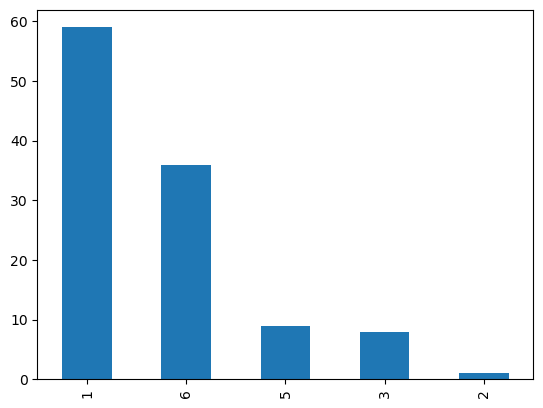

In [16]:
least["INTER1"].value_counts().plot(kind="bar")

<AxesSubplot:>

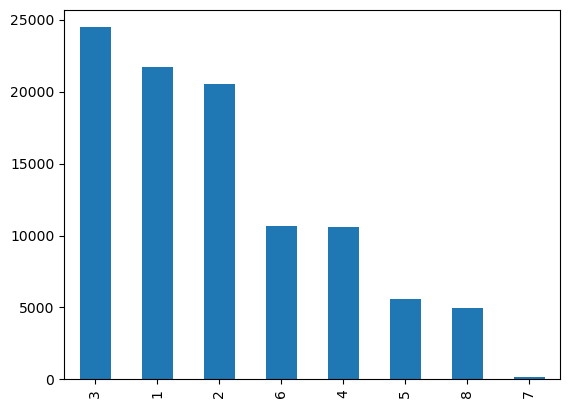

In [17]:
most["INTER1"].value_counts().plot(kind="bar")

- **3** and **2** which were the ***least*** in the last 3 countries are the ***most*** in the first 3 countries

#### Disorder types in the countries

<AxesSubplot:>

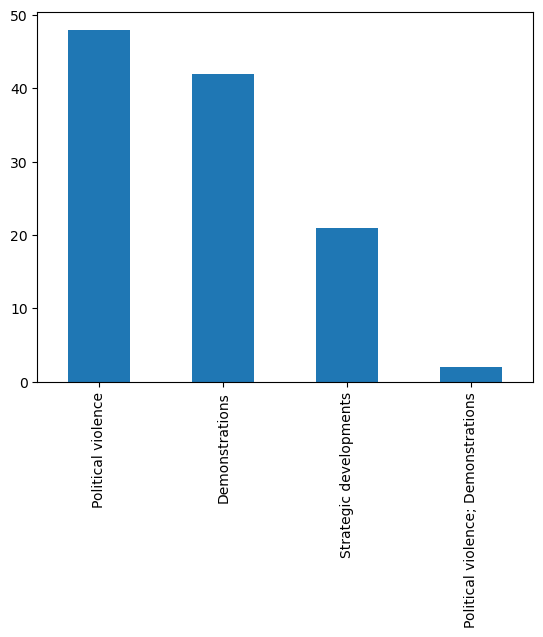

In [18]:
least["DISORDER_TYPE"].value_counts().plot(kind="bar")

<AxesSubplot:>

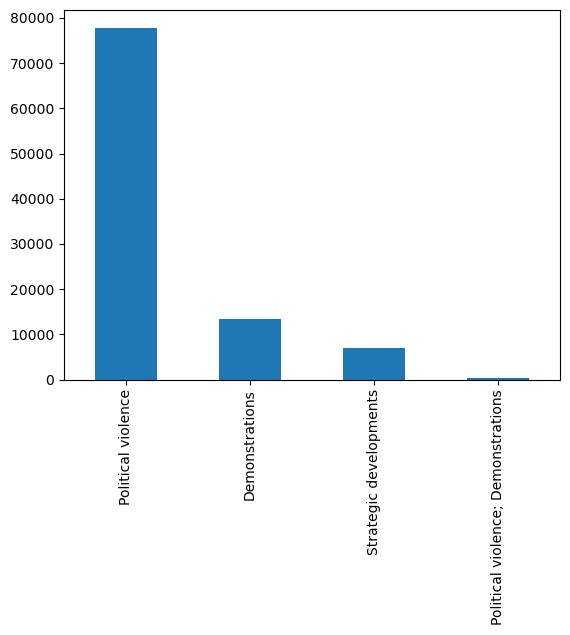

In [19]:
most["DISORDER_TYPE"].value_counts().plot(kind="bar")

- **Political violence** topped both classes in the highest disorder type

<AxesSubplot:>

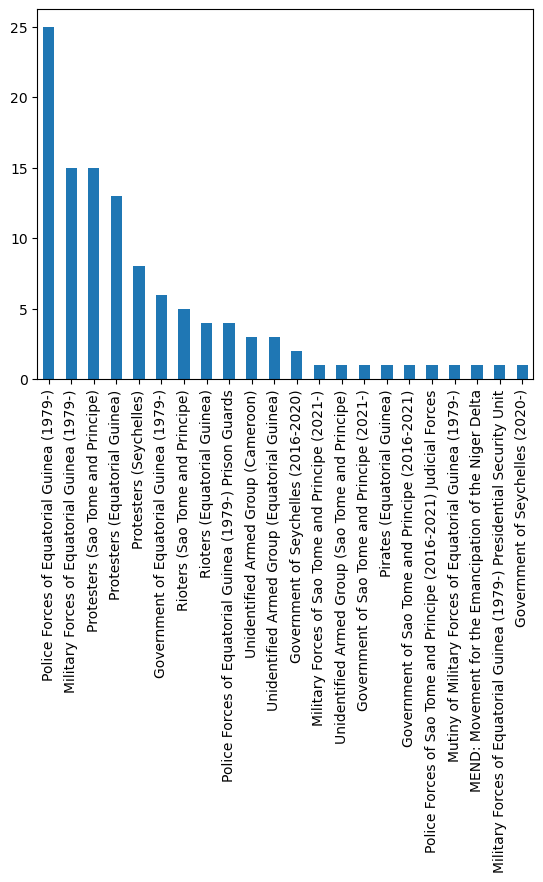

In [20]:
least["ACTOR1"].value_counts().plot(kind="bar")

- Main actors in the countries

<AxesSubplot:>

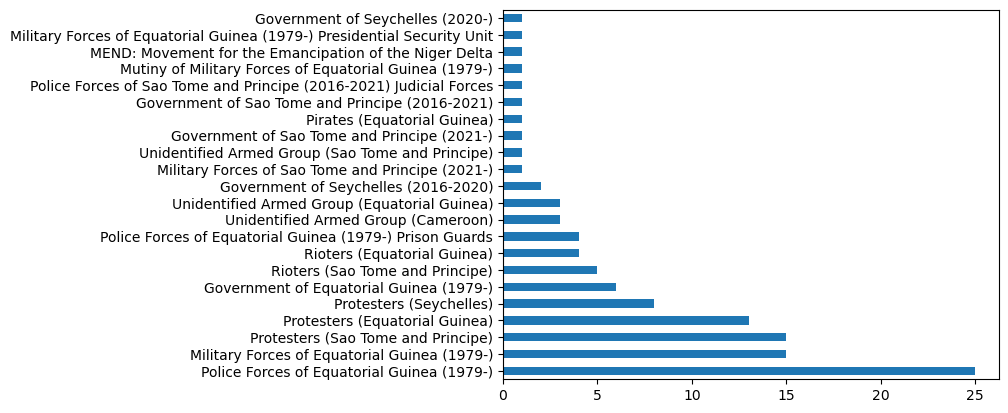

In [21]:
main_actors = least["ACTOR1"].value_counts()
main_actors.plot(kind="barh")

<AxesSubplot:>

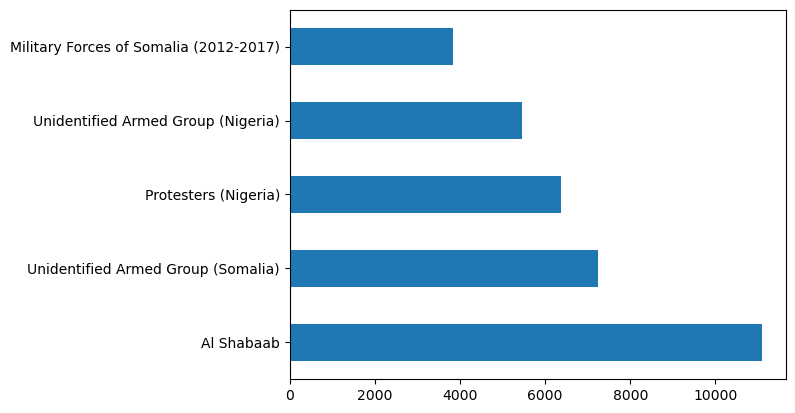

In [22]:
main_actors_most = most["ACTOR1"].value_counts()
main_actors_most.head().plot(kind="barh")

- **Unidentified armed group (Somalia)** and **Al Shabaab** carry the most weight in parties involved in conflicts

- Generating wordcloud for the main actors in both classes 

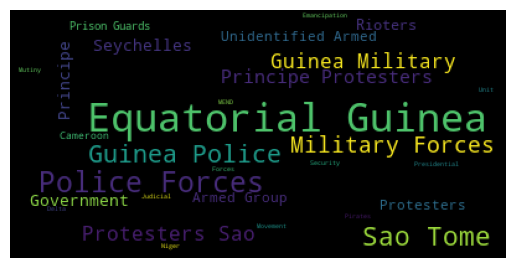

In [24]:
fields = ['ACTOR1']

text3 = ' '.join(least['ACTOR1'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

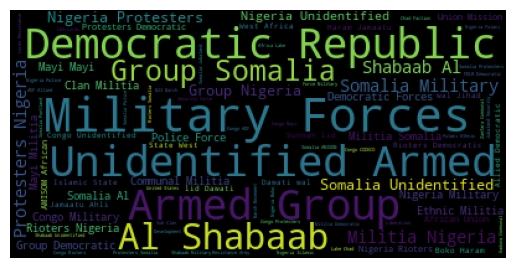

In [25]:
fields = ['ACTOR1']

text3 = ' '.join(most['ACTOR1'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#### Fatalities
- ***INTER1*** vs ***Fatalities***

<AxesSubplot:ylabel='INTER1'>

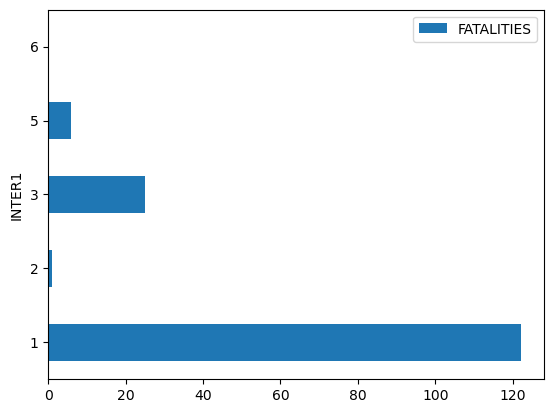

In [26]:
least.groupby("INTER1")[["FATALITIES"]].sum().plot(kind="barh")

<AxesSubplot:ylabel='INTER1'>

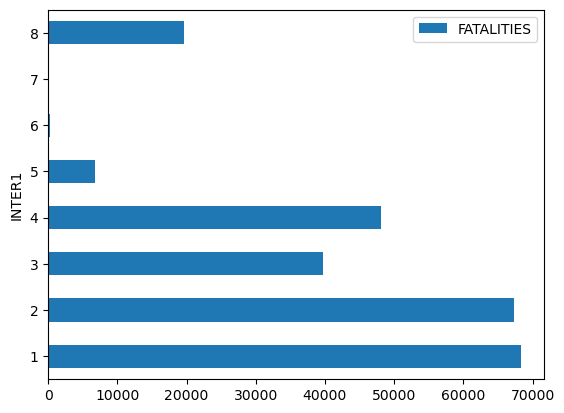

In [27]:
most.groupby("INTER1")[["FATALITIES"]].sum().plot(kind="barh")

- **1** responsible for most fatalities in both cases
- **2, 3, 4** which are rare in least prominent in high fatality areas

- ***Event and Sub_event type vs fatalities***

<AxesSubplot:ylabel='EVENT_TYPE,SUB_EVENT_TYPE'>

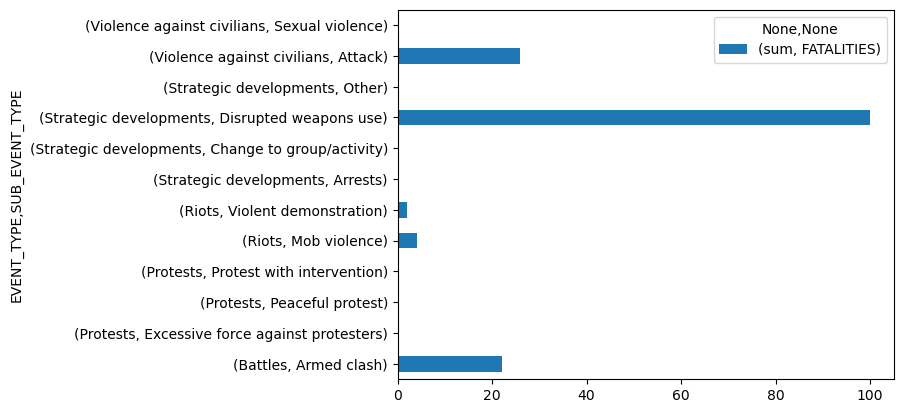

In [24]:
pd.pivot_table(least,
              index = ["EVENT_TYPE","SUB_EVENT_TYPE"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.barh()

# add .plot.barh() to visualize your pivot tables

<AxesSubplot:ylabel='EVENT_TYPE,SUB_EVENT_TYPE'>

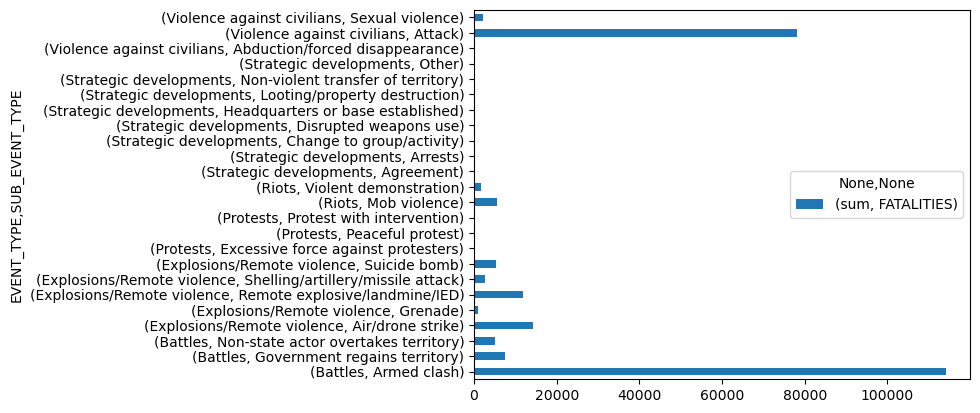

In [25]:
pd.pivot_table(most,
              index = ["EVENT_TYPE","SUB_EVENT_TYPE"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.barh()
# add .plot.barh() to visualize your pivot tables

- **Armed clashes** and **attack against civlians** most prominent in countries with high number of conflict occurances.
- The above events are not prominent in areas least affected by conflict

In [30]:
least.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 72179 to 176161
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EVENT_ID_CNTY   113 non-null    object        
 1   EVENT_DATE      113 non-null    datetime64[ns]
 2   YEAR            113 non-null    int64         
 3   TIME_PRECISION  113 non-null    int64         
 4   DISORDER_TYPE   113 non-null    object        
 5   EVENT_TYPE      113 non-null    object        
 6   SUB_EVENT_TYPE  113 non-null    object        
 7   ACTOR1          113 non-null    object        
 8   INTER1          113 non-null    int64         
 9   INTER2          113 non-null    int64         
 10  INTERACTION     113 non-null    int64         
 11  ISO             113 non-null    int64         
 12  REGION          113 non-null    object        
 13  COUNTRY         113 non-null    object        
 14  ADMIN1          113 non-null    object        
 15 

- ***Fatalities across the years***

<AxesSubplot:xlabel='YEAR'>

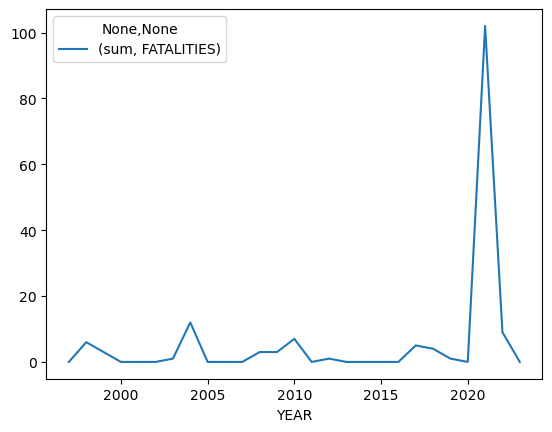

In [26]:
pd.pivot_table(least,
              index = ["YEAR"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.line()

<AxesSubplot:xlabel='YEAR'>

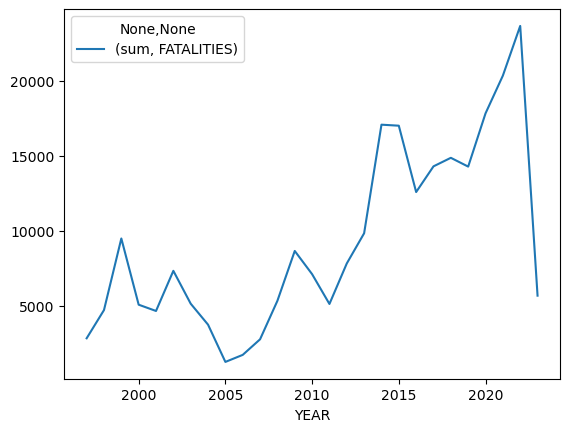

In [32]:
pd.pivot_table(most,
              index = ["YEAR"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.line()

- Creating new column month to see if there are any trends

In [33]:
least["MONTH"] = least["EVENT_DATE"].dt.strftime("%m")
most["MONTH"] = most["EVENT_DATE"].dt.strftime("%m")
print(least.columns)
print(most.columns)

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'INTER1',
       'INTER2', 'INTERACTION', 'ISO', 'REGION', 'COUNTRY', 'ADMIN1',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP', 'MONTH'],
      dtype='object')
Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'INTER1',
       'INTER2', 'INTERACTION', 'ISO', 'REGION', 'COUNTRY', 'LOCATION',
       'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE',
       'NOTES', 'FATALITIES', 'TIMESTAMP', 'MONTH'],
      dtype='object')


- Comparing fatalities across the months

<AxesSubplot:ylabel='MONTH'>

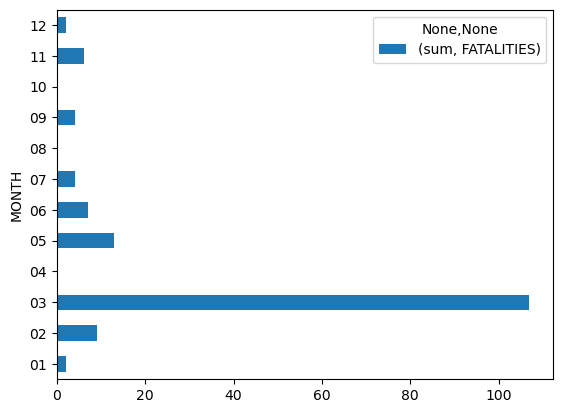

In [34]:
pd.pivot_table(least,
              index = ["MONTH"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.barh()

<AxesSubplot:ylabel='MONTH'>

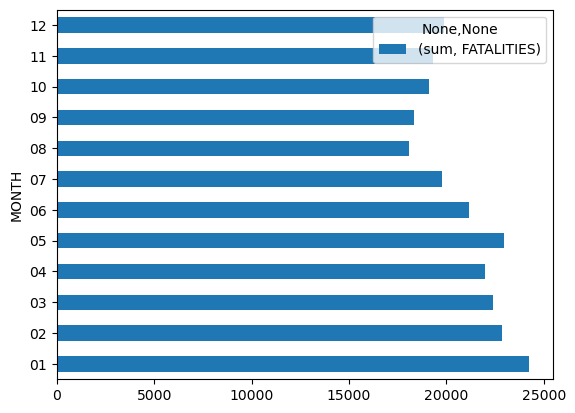

In [35]:
pd.pivot_table(most,
              index = ["MONTH"],
              values = ["FATALITIES"],
              aggfunc=["sum"]).plot.barh()

- Not much insights gained from the fatalities across the months for both cases

In [14]:
fatalities = pd.pivot_table(data,
              index = ["COUNTRY"],
              values = ["FATALITIES"],
              aggfunc=["sum"])


# fatalities= fatalities.sort_values(by=["FATALITIES"], ascending=False)
fatalities.head()
# add .plot.barh() to visualize your pivot tables

,sum
,FATALITIES
COUNTRY,
Algeria,13740
Angola,144098
Benin,497
Botswana,18
Burkina Faso,14042
